In [3]:
import django, os, sys, time, resource, re, gc, shutil
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from django.db.models import Count, Avg

sys.path.append('/home/galm/software/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
qid = 1457

In [55]:
bgs = Bigram.objects.filter(docbigram__doc__query=qid).values('stem2','pos').annotate(
    n = models.Count('docbigram__pk')
).order_by('-n')


In [71]:
df = pd.DataFrame.from_dict(list(bgs))
allwords = df
df.head()

,n,pos,stem2
0,15741,1,develop
1,4451,-1,environment
2,4156,1,manag
3,3127,1,agricultur
4,2707,1,use


-1


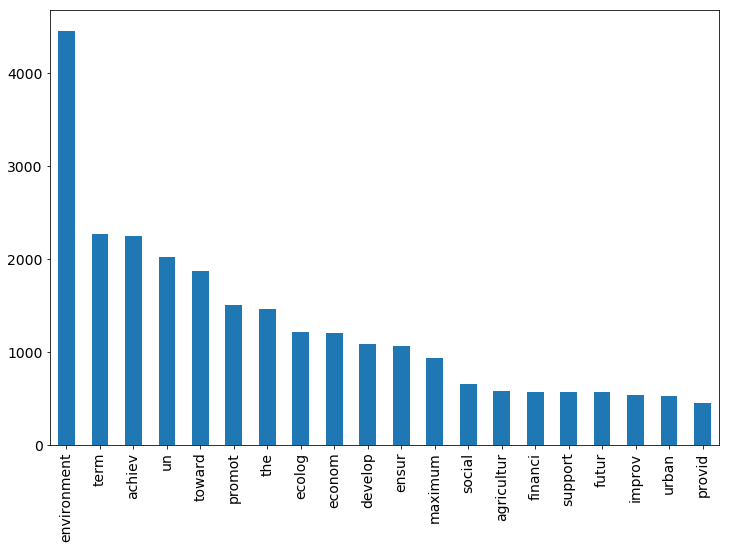

1


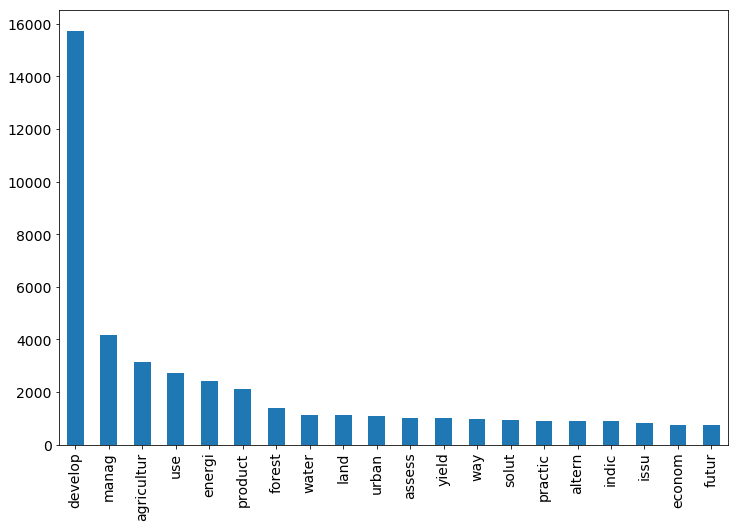

In [27]:
plt.rcParams["figure.figsize"] = [12,8]
for name, group in df.groupby('pos'):
    print(name)
    pdf = group.head(20)
    ax = pdf['n'].plot.bar()
    ax.set_xticklabels(pdf.stem2)
    ax.tick_params(labelsize=14)
    plt.show()

In [77]:
bgs = Bigram.objects.filter(docbigram__doc__query=qid).values('stem2','pos','docbigram__doc__PY').annotate(
    n = models.Count('docbigram__pk')
).order_by('-n')
df = pd.DataFrame.from_dict(list(bgs))
df.head()

,docbigram__doc__PY,n,pos,stem2
0,2016,1950,1,develop
1,2015,1692,1,develop
2,2014,1315,1,develop
3,2013,1278,1,develop
4,2012,1157,1,develop


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


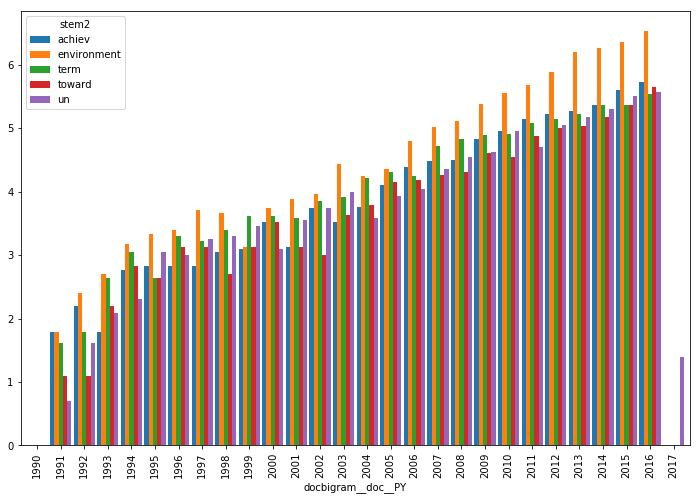

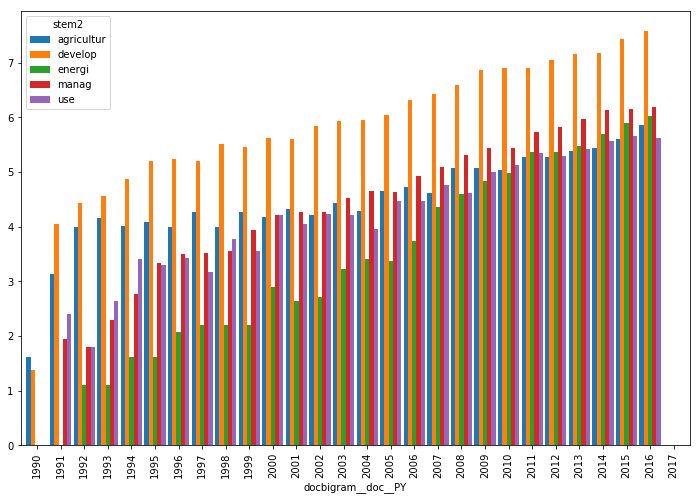

In [85]:
for i in [-1,1]:
    pdf = df[(df['stem2'].isin(list(allwords[allwords['pos']==i].head()['stem2']))) & (df['pos']==i)]
    pdf['n'] = np.log(pdf['n'])
    pdf = pd.pivot_table(data=pdf, 
                            index='docbigram__doc__PY',
                            columns='stem2',
                            values='n'
                        )
    pdf.plot.bar(width=0.9)
    plt.show()

In [65]:
pdf

stem2,agricultur,develop,environment,manag,use
docbigram__doc__PY,2003.000000,2003.500000,2003.88,2003.500000,2003.500000
n,115.814815,562.178571,9.28,159.846154,104.115385
pos,1.000000,1.000000,1.00,1.000000,1.000000
